In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression as LR
%matplotlib inline

In [3]:
train = pd.read_csv("C:/Users/user/Desktop/Lunchbox/train.csv")
test = pd.read_csv("C:/Users/user/Desktop/Lunchbox/test.csv")
sample = pd.read_csv("C:/Users/user/Desktop/Lunchbox/sample.csv", header=None)

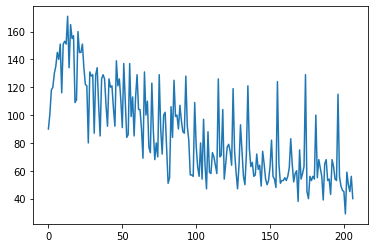

In [32]:
plt.plot(train["y"])
plt.show()

In [33]:
# datetimeを分割して設定
train['year'] = train['datetime'].apply(lambda x : x.split('-')[0])
train['month'] = train['datetime'].apply(lambda x : x.split('-')[1])
test['year'] = test['datetime'].apply(lambda x : x.split('-')[0])
test['month'] = test['datetime'].apply(lambda x : x.split('-')[1])

# 新規で定義したカラムのデータ型はobject型になってしまうため、int型へ変換する
train['yaer'] = train['year'].astype(np.int)
train['month'] = train['month'].astype(np.int)
test['yaer'] = test['year'].astype(np.int)
test['month'] = test['month'].astype(np.int)

In [34]:
train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,year,month,yaer
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8,2013,11,2013
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0,2013,11,2013
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5,2013,11,2013
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2,2013,11,2013
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1,2013,11,2013


In [5]:
train.isnull().sum()

datetime           0
y                  0
week               0
soldout            0
name               0
kcal              41
remarks          186
event            193
payday           197
weather            0
precipitation      0
temperature        0
dtype: int64

In [72]:
x_train = train[["year", "month", "remarks_in","temperature"]]
x_test = train[["year", "month", "remarks_in","temperature"]]
x_test.tail()

,year,month,remarks_in,temperature
202,2014,9,0,24.8
203,2014,9,0,25.4
204,2014,9,0,27.1
205,2014,9,0,26.6
206,2014,9,0,28.1


In [62]:
y_train = train["y"]

In [63]:
model = LR()

In [64]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
model.coef_

array([-76.3765687 ,  -4.20489757,  44.63348171,  -1.25463854])

In [66]:
model.intercept_

153945.2541175828

In [70]:
# 予測
pred = model.predict(x_test)
print(pred)
print(len(pred))
print(len(sample[1]))

[128.12560507 131.63859298 133.5205508  133.89694236 132.76776767
 134.64972548 130.5094183  134.52426163 130.76034601 137.78632184
 131.44853875 131.32307489 131.82493031 131.44853875 130.06843635
 137.34533989 139.85461698 134.96152666 133.33049656 131.32307489
 134.5851351  135.21245437 138.97637    140.23100854 138.22358687
 134.33420739 138.72544229 139.60368927 109.48099385 106.3443975
 104.9642951  112.24119865 111.36295167 115.00140344 109.85738542
 108.85367458 110.48470469 105.59161437 109.35553    107.9754276
 105.96800594 112.24119865 102.83140958 105.71707823  99.44388552
 100.94945177  94.48620482 109.66733118 110.67104201 109.16547576
 107.53444566 104.64877701 106.53073482 106.40527097 112.92939139
  99.88115055 105.90341555 105.27609628 107.65990951 103.77053003
 106.15434326 101.26125295 100.00661441 103.77053003  92.22785545
 100.44387944  99.81656017 102.57676496 101.82398184 101.44759027
 100.69480715  99.31470475  91.66140965  91.15955423  95.80171684
  92.6651204

In [67]:
pred = model.predict(x_test)
sample[1] = pred

ValueError: Length of values does not match length of index

In [14]:
sample.to_csv("C:/Users/user/Desktop/Lunchbox/submit.csv", index=None, header=None)

In [15]:
train["y"].plot
plt.show()

In [35]:
train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,year,month,yaer
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8,2013,11,2013
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0,2013,11,2013
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5,2013,11,2013
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2,2013,11,2013
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1,2013,11,2013


In [37]:
pred = model.predict(x_train)

In [38]:
train["pred"] = pred

In [39]:
train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,year,month,yaer,pred
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8,2013,11,2013,93.686739
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0,2013,11,2013,94.384446
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5,2013,11,2013,94.311359
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2,2013,11,2013,87.629329
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1,2013,11,2013,96.202049


In [40]:
train["GAP"] = train["y"] - train["pred"]

In [41]:
train.sort_values(by='GAP')

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,year,month,yaer,pred,GAP
98,2014-4-18,56,金,1,鶏の味噌漬け焼き,325.0,NaN,ママの会,NaN,曇,0,11.4,2014,4,2014,108.134319,-52.134319
201,2014-9-22,29,月,0,筑前煮,395.0,NaN,NaN,NaN,晴れ,--,25.2,2014,9,2014,79.977323,-50.977323
54,2014-2-14,86,金,1,ロース甘味噌焼き,432.0,NaN,NaN,NaN,雪,0.5,1.2,2014,2,2014,134.029882,-48.029882
69,2014-3-7,73,金,1,ボローニャ風カツ,396.0,NaN,NaN,NaN,快晴,--,7.0,2014,3,2014,119.304954,-46.304954
82,2014-3-27,55,木,1,ロース甘味噌焼き,315.0,NaN,NaN,NaN,曇,1.5,12.4,2014,3,2014,94.737915,-39.737915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2014-6-13,121,金,0,キーマカレー,NaN,お楽しみメニュー,NaN,NaN,晴れ,--,29.5,2014,6,2014,62.182387,58.817613
8,2013-11-28,151,木,0,ハンバーグ,NaN,NaN,NaN,NaN,薄曇,--,17.7,2013,11,2013,81.282377,69.717623
174,2014-8-8,129,金,0,チキンカレー,NaN,お楽しみメニュー,NaN,1.0,曇,--,31.1,2014,8,2014,58.120338,70.879662
155,2014-7-11,124,金,0,ポークカレー,NaN,お楽しみメニュー,NaN,NaN,晴れ,--,33.9,2014,7,2014,51.011752,72.988248


In [49]:
train.sort_values(by=['GAP'],ascending=True)

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,year,month,yaer,pred,GAP
98,2014-4-18,56,金,1,鶏の味噌漬け焼き,325.0,NaN,ママの会,NaN,曇,0,11.4,2014,4,2014,108.134319,-52.134319
201,2014-9-22,29,月,0,筑前煮,395.0,NaN,NaN,NaN,晴れ,--,25.2,2014,9,2014,79.977323,-50.977323
54,2014-2-14,86,金,1,ロース甘味噌焼き,432.0,NaN,NaN,NaN,雪,0.5,1.2,2014,2,2014,134.029882,-48.029882
69,2014-3-7,73,金,1,ボローニャ風カツ,396.0,NaN,NaN,NaN,快晴,--,7.0,2014,3,2014,119.304954,-46.304954
82,2014-3-27,55,木,1,ロース甘味噌焼き,315.0,NaN,NaN,NaN,曇,1.5,12.4,2014,3,2014,94.737915,-39.737915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2014-6-13,121,金,0,キーマカレー,NaN,お楽しみメニュー,NaN,NaN,晴れ,--,29.5,2014,6,2014,62.182387,58.817613
8,2013-11-28,151,木,0,ハンバーグ,NaN,NaN,NaN,NaN,薄曇,--,17.7,2013,11,2013,81.282377,69.717623
174,2014-8-8,129,金,0,チキンカレー,NaN,お楽しみメニュー,NaN,1.0,曇,--,31.1,2014,8,2014,58.120338,70.879662
155,2014-7-11,124,金,0,ポークカレー,NaN,お楽しみメニュー,NaN,NaN,晴れ,--,33.9,2014,7,2014,51.011752,72.988248


In [48]:
train.sort_values(by=['remarks'],ascending=True)

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,year,month,yaer,pred,GAP
145,2014-6-27,74,金,0,牛丼,NaN,お楽しみメニュー,NaN,NaN,雨,0,25.4,2014,6,2014,72.591388,1.408612
196,2014-9-12,115,金,0,ポークカレー,NaN,お楽しみメニュー,NaN,NaN,晴れ,--,27.3,2014,9,2014,67.767705,47.232295
83,2014-3-28,106,金,0,キーマカレー,NaN,お楽しみメニュー,NaN,NaN,快晴,--,18.5,2014,3,2014,90.108975,15.891025
93,2014-4-11,128,金,1,チキンカレー,NaN,お楽しみメニュー,NaN,NaN,快晴,--,16.5,2014,4,2014,95.186537,32.813463
103,2014-4-25,80,金,0,中華丼,NaN,お楽しみメニュー,NaN,NaN,晴れ,--,20.8,2014,4,2014,84.269780,-4.269780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,2014-9-22,29,月,0,筑前煮,395.0,NaN,NaN,NaN,晴れ,--,25.2,2014,9,2014,79.977323,-50.977323
202,2014-9-24,59,水,1,白身魚のマスタード焼き,408.0,NaN,NaN,NaN,曇,0,24.8,2014,9,2014,70.700698,-11.700698
203,2014-9-25,50,木,0,牛カルビ焼き肉,394.0,NaN,NaN,NaN,曇,0,25.4,2014,9,2014,61.733766,-11.733766
205,2014-9-29,56,月,1,豚肉と玉子の炒め,404.0,NaN,NaN,NaN,快晴,--,26.6,2014,9,2014,76.423030,-20.423030


In [50]:
def remarks_2(x):
    if x == "お楽しみメニュー":
        return 1
    else:
        return 0

remarks_2 = lambda x: 1 if x  == "お楽しみメニュー" else 0

In [59]:
train['remarks_in'] = train['remarks'].apply(lambda x : remarks_2(x))
test['remarks_in'] = test['remarks'].apply(lambda x : remarks_2(x))

In [60]:
test.sort_values(by=['remarks_in'],ascending=False)[:10]

,datetime,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,year,month,yaer,remarks_in
25,2014-11-7,金,0,ポークカレー,NaN,お楽しみメニュー,NaN,NaN,晴れ,--,20.1,2014,11,2014,1
35,2014-11-21,金,0,ロコモコ丼,NaN,お楽しみメニュー,NaN,NaN,快晴,--,14.9,2014,11,2014,1
16,2014-10-24,金,0,唐揚げ丼,NaN,お楽しみメニュー,NaN,NaN,快晴,--,18.7,2014,10,2014,1
7,2014-10-10,金,0,ポークカレー,NaN,お楽しみメニュー,NaN,1.0,薄曇,--,26.1,2014,10,2014,1
0,2014-10-1,水,1,メンチカツ,420.0,NaN,NaN,NaN,雨,0,20.2,2014,10,2014,0
29,2014-11-13,木,1,白身魚味噌焼き,396.0,近隣に飲食店複合ビルオープン,キャリアアップ支援セミナー,NaN,快晴,--,19.5,2014,11,2014,0
23,2014-11-5,水,1,ハンバーグ,425.0,NaN,NaN,NaN,曇,--,16.0,2014,11,2014,0
24,2014-11-6,木,1,彩り野菜と鶏肉の黒酢あん,410.0,NaN,NaN,NaN,曇,--,19.2,2014,11,2014,0
26,2014-11-10,月,0,親子煮,412.0,NaN,NaN,1.0,快晴,--,21.2,2014,11,2014,0
27,2014-11-11,火,0,ポークのバーベキューソテー,426.0,NaN,NaN,NaN,曇,0,14.7,2014,11,2014,0
